In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
root_dir = os.getcwd()
sys.path.append(root_dir)

In [5]:
from src import datatypes, definitions, electron_functions

In [34]:
def eval_wavefunction(n, l, m, resolution):
    radialdensity = datatypes.RadialElectronDensity(resolution=resolution)

    rr, pp, psps = np.meshgrid(radialdensity.density.coords["r"].data, radialdensity.density.coords["phi"].data, radialdensity.density.coords["psi"].data)
        
    result = electron_functions.wavefunction(n, l, m, rr, pp, psps)

    return result

In [66]:
radialdensity = datatypes.RadialElectronDensity(resolution={"r": 25, "phi":25, "psi": 25})

rr, pp, psps = np.meshgrid(radialdensity.density.coords["r"].data, radialdensity.density.coords["phi"].data, radialdensity.density.coords["psi"].data)

In [67]:
density = eval_wavefunction(2, 1, 1, {"r": 25, "phi":25, "psi": 25})

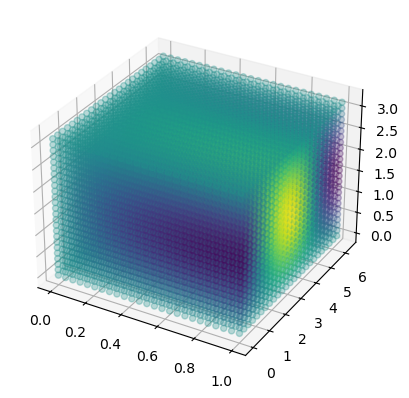

In [69]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(xs=rr, ys=pp, zs=psps, c=density, alpha=0.3)

plt.show()

radialdensity = datatypes.RadialElectronDensity(resolution={"r": 100, "phi":100, "psi": 100})